In [7]:
import matplotlib.pyplot as plt
import pyart
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from datetime import datetime
from metpy.plots import USCOUNTIES, colortables

In [8]:
radarFile='/home/CarterHumphreys/research/les_neural_network/data/NEXRAD/Ontario_LES_Event20/Ontario_LES_Event20-KTYX20171207_175809_V06'
product='reflectivity'
cmap=colortables.get_colortable('Carbone42')
dataMin=-23
dataMax=77
units='dBZ'
showLatLon=True
showCountryBorders=True
showStateBorders=True
showCountyBorders=True

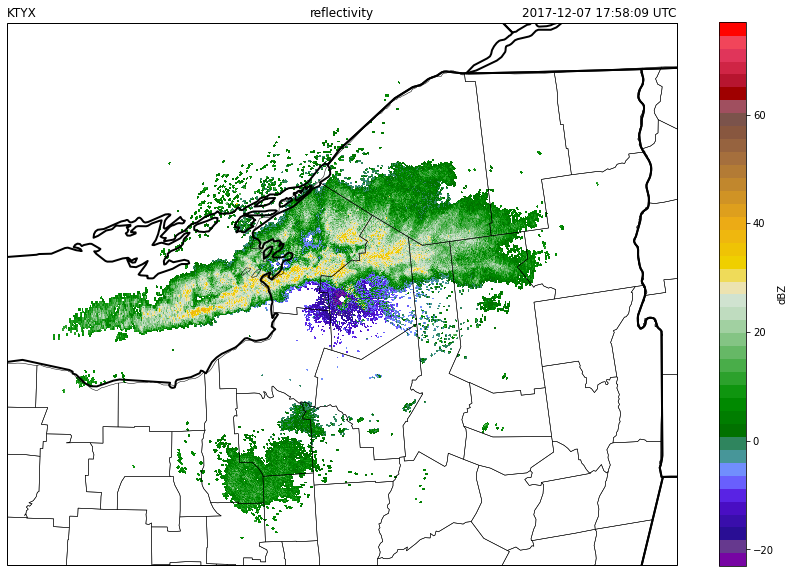

In [9]:
# Read in data
radar = pyart.io.read_nexrad_archive(f'{radarFile}')
display = pyart.graph.RadarMapDisplay(radar)
site=radar.metadata['instrument_name']
time=datetime.strptime(radar.time['units'], 'seconds since %Y-%m-%dT%H:%M:%SZ')
sweep=0
if product=='velocity':
    sweep=1

# Setup projection
plotExtent = [radar.longitude['data'][0]-2.5, radar.longitude['data'][0]+2.5, radar.latitude['data'][0]-1.5, radar.latitude['data'][0]+1.5]
proj = ccrs.LambertConformal(central_longitude=((plotExtent[1]-plotExtent[0])/2+plotExtent[0]), central_latitude=((plotExtent[3]-plotExtent[2])/2+plotExtent[2]))
lon_lines=np.arange(round(plotExtent[0]-1, 0), round(plotExtent[1]+1, 0), 0.5)
lat_lines=np.arange(round(plotExtent[2]-1, 0), round(plotExtent[3]+1, 0), 0.5)

# Setup plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Make plot
display.plot_ppi_map(product, sweep, vmin=dataMin, vmax=dataMax, cmap=cmap, title=product.replace('_', ' '), colorbar_label=units,
                    min_lon=plotExtent[0], max_lon=plotExtent[1], min_lat=plotExtent[2], max_lat=plotExtent[3],
                    ax=ax, raster=True, embelish=False)

# Add geographic features
if showStateBorders:
    state_borders=cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='10m', facecolor='none')
    ax.add_feature(state_borders, edgecolor='black', linewidth=2.0)

if showCountyBorders:
    ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor='black', linewidth=0.5)


# Plot Title
plt.title(f'{site}', loc='left')
plt.title(f'{time.strftime("%Y-%m-%d %H:%M:%S")} UTC', loc='right')

plt.show()